# Initial testing of machine learning algorithms

Splitting the dataframe into a training and testing set to train several machine learning and check which one has the highest accuracy

In [ ]:
#Imports

import pandas as pd
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [27]:
complete_df = pd.read_csv(os.path.join('..','..','data',"titanic.csv"))

train_df, test_df = train_test_split(complete_df, test_size=0.25, random_state=25)
print(f"No. of training examples: {train_df.shape[0]}")
print(f"No. of testing examples: {test_df.shape[0]}")

No. of training examples: 981
No. of testing examples: 327


In [28]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("Survived", axis=1)
Y_test = test_df["Survived"]

Testing accuracy of the SGD Classifier which generates the worst accuracy from all of the algorithms. Since a new value is generated every time, 1000 cases were taken and a mean and modal value were displayed to show the average and most common accuracies generated.

In [29]:
sgda =[]
i = 0
while i < 1000:
    #possible solution is to run it multiple times and find the average
    sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
    sgd.fit(X_train, Y_train)

    sgd.score(X_train, Y_train)
    sgda.append(round(sgd.score(X_test, Y_test) * 100, 2))
    i += 1
    
print(sgda)

[75.84, 57.8, 67.58, 66.06, 71.25, 69.11, 66.67, 68.5, 74.92, 69.42, 59.94, 67.28, 69.42, 75.23, 70.64, 62.69, 66.97, 65.75, 69.42, 37.31, 62.69, 69.11, 65.75, 69.42, 63.0, 63.61, 66.67, 43.12, 63.0, 63.3, 68.5, 66.06, 70.03, 69.42, 65.75, 65.75, 40.06, 68.2, 70.03, 63.91, 66.67, 68.81, 37.92, 56.57, 59.63, 65.44, 71.87, 69.42, 68.2, 66.97, 42.2, 69.11, 62.69, 66.36, 64.53, 66.06, 69.11, 62.69, 72.17, 45.87, 43.43, 71.25, 65.14, 66.67, 66.06, 68.5, 70.34, 65.75, 65.44, 37.0, 68.5, 38.23, 66.06, 63.61, 59.02, 37.61, 68.2, 64.22, 69.11, 69.42, 45.87, 63.3, 62.69, 74.62, 59.94, 72.17, 69.42, 68.2, 65.44, 62.39, 74.31, 66.36, 65.14, 62.69, 63.91, 69.72, 71.25, 69.11, 62.69, 70.95, 68.81, 37.92, 69.72, 39.14, 60.86, 37.92, 39.76, 65.75, 67.28, 38.23, 60.24, 64.83, 73.09, 62.08, 63.61, 62.69, 71.87, 61.77, 66.97, 68.5, 37.31, 62.69, 73.39, 62.69, 70.64, 49.85, 65.75, 73.09, 69.42, 60.55, 70.34, 66.36, 56.57, 66.36, 69.72, 66.06, 67.28, 68.81, 68.5, 66.36, 70.64, 62.69, 68.81, 68.81, 70.34, 6

In [30]:
import statistics
print("Mean value: ",statistics.mean(sgda))
print("Mode value: ",statistics.mode(sgda))

Mean value:  62.34974
Mode value:  62.69


This graph depicts how many times an accuracy value was generated form the algorithm

Text(0, 0.5, 'Count')

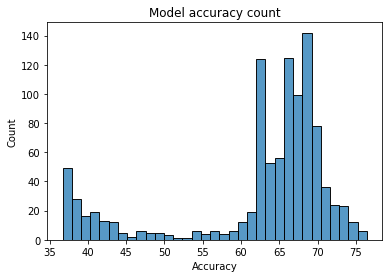

In [31]:
sns.histplot(sgda, stat="count", multiple="stack",
             kde=False,
             element="bars", legend=True)
plt.title("Model accuracy count")
plt.xlabel("Accuracy")
plt.ylabel("Count")

Testing accuracy of the KNN Classifier which generates the second best accuracy from all of the algorithms with 13 neighbours providing the highest accuracy

In [32]:
knn = KNeighborsClassifier(n_neighbors = 13) 
knn.fit(X_train, Y_train)  
knnR = round(knn.score(X_test, Y_test) * 100, 2)
print(knnR)

70.03


Testing accuracy of the Random Forest Classifier which generates the highest accuracy from all of the algorithms

In [33]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

random_forest.score(X_test, Y_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

print(acc_random_forest)

95.62


Sources: https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
         https://www.kaggle.com/code/allohvk/titanic-missing-age-imputation-tutorial-advanced/notebook